In [1]:
import pandas as pd
import numpy as np

In [2]:
def serialReadFile(filename):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename, header = 0)
    
    df = df.drop('label', axis=1)

    return df

In [3]:
filename = "data/tot_mnist_shuf.csv"
data = serialReadFile(filename)
data.shape
data.head()
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
def serialAssign2cluster(centroids, x):
    distances = [np.sqrt(np.sum(np.square(x - centroid))) for centroid in centroids]
    # Find the index of the closest centroid
    closest_index = np.argmin(distances)
    return closest_index

#### Serial kmens with indexes

In this version of the serial kmeans once we've identified the closest centroid for a point, we save the index of the centroid inside a list where the position inside this list correspond to the specific example. 
So we will have a list of indexes (of clusters) in the postion of the example.

In [5]:
def serialKMeans(X, K, n_iter):
    centroids = np.random.rand(K, X.shape[1])  # Random initialization of centroids

    for i in range(n_iter):
        assignments = []
        # Iterate over each data point
        for x in X:
            assignment = serialAssign2cluster(centroids, x)
            assignments.append(assignment)

        # Update step
        for j in range(K):
            # Select points assigned to the jth centroid
            assigned_points = X[np.array(assignments) == j]

            # Update centroid to be the mean of assigned points
            if len(assigned_points) > 0:
                centroids[j] = np.mean(assigned_points, axis=0)
            else:
                centroids[j] = np.random.rand(X.shape[1])
    return centroids

#### Serial kmeans clusters version

In this version once we've identified the closest index we append the example x in the respective cluster.
So our clusters will be a list of list of dimension K and each list contains the list of the points belonging to that cluster.

In [7]:

def serialKMeans(X, K, n_iter):
    centroids = np.random.rand(K, X.shape[1])  # Random initialization of centroids

    for i in range(n_iter):
        # Initialize a list of lists for clusters
        clusters = [[] for n in range(K)]

        # Assignment step
        for x in X:
            assignment = serialAssign2cluster(centroids, x)
            # Append the point to the corresponding cluster
            clusters[assignment].append(x)

        # Update step
        for j in range(K):
            assigned_points = np.array(clusters[j])  # Convert list of points to a NumPy array

            # Update centroid to be the mean of assigned points
            if len(assigned_points) > 0:
                centroids[j] = np.mean(assigned_points, axis=0)
            else:
                centroids[j] = np.random.rand(X.shape[1])

    return centroids

In [6]:
data = data.values
centroids = serialKMeans(data, 10, 15)

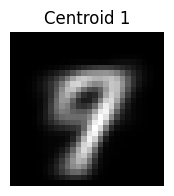

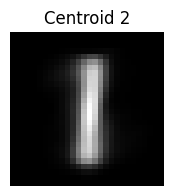

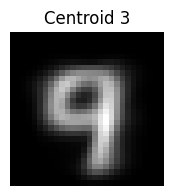

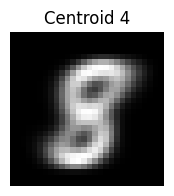

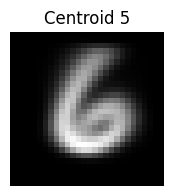

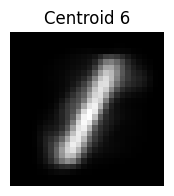

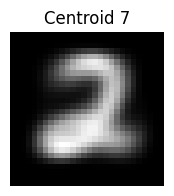

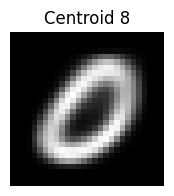

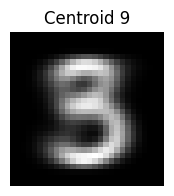

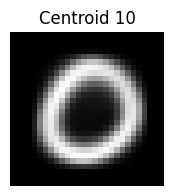

In [7]:
import matplotlib.pyplot as plt

# Assuming 'centroids' is a list of centroids, where each centroid is an array of pixel values
for i, centroid in enumerate(centroids):
    image = centroid.reshape((28, 28))  # reshape the centroid to the size of the image
    fig = plt.figure(figsize=(2, 2))  # you can adjust the figure size as needed
    plt.imshow(image, cmap='grey')  
    plt.title(f'Centroid {i+1}')
    plt.axis('off')  # turn off the axis
    plt.show()
